<a href="https://colab.research.google.com/github/georgywasiat/Graduation-Prediction-with-SVM-and-PCA/blob/main/Student_Graduation_Prediction_using_Support_Vector_Machine_(SVM)_Algorithm_and_Principal_Component_Analysis_(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Georgy Banny Rizky Wasiat

24060121140103

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
kelulusan = pd.read_csv('/content/drive/My Drive/ml baru banget/merge dataset.csv')

kelulusan_df = pd.DataFrame(kelulusan)

In [ ]:
kelulusan.head(20)

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.00,3.07,TERLAMBAT
1,DWI HESTYNA PRIHASTANTY,PEREMPUAN,MAHASISWA,32,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.00,3.17,TERLAMBAT
2,MURYA ARIEF BASUKI,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.00,3.54,TERLAMBAT
3,NANIK SUSANTI,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.00,3.41,TERLAMBAT
4,RIFKA ISTIQFARINA,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.00,3.09,TERLAMBAT
5,SUHARYONO,LAKI - LAKI,BEKERJA,27,BELUM MENIKAH,2.95,2.82,3.09,3.10,2.78,3.16,3.23,0.00,3.07,TERLAMBAT
6,FARIKHATUN NAZLI,PEREMPUAN,MAHASISWA,26,BELUM MENIKAH,2.76,3.14,2.60,2.95,3.23,3.33,3.30,3.30,3.06,TEPAT
7,FIFI SUNALISA,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,2.62,2.89,2.32,2.50,2.50,2.86,3.05,2.50,2.91,TEPAT
8,HENDRIK MULIYANTO,PEREMPUAN,BEKERJA,25,MENIKAH,3.60,3.54,3.52,3.39,3.52,3.68,3.15,0.00,3.40,TERLAMBAT
9,IMAM AGUNG RIBOWO,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.71,2.55,1.77,2.11,1.93,2.13,1.78,0.20,2.20,TERLAMBAT


In [ ]:
# Ganti nilai pada kolom 'JENIS KELAMIN'
kelulusan_df['JENIS KELAMIN'] = kelulusan_df['JENIS KELAMIN'].replace({'LAKI - LAKI': 1, 'PEREMPUAN': 0})

# Ganti nilai pada kolom 'STATUS MAHASISWA'
kelulusan_df['STATUS MAHASISWA'] = kelulusan_df['STATUS MAHASISWA'].replace({'BEKERJA': 1, 'MAHASISWA': 0})

# Ganti nilai pada kolom 'STATUS NIKAH'
kelulusan_df['STATUS NIKAH'] = kelulusan_df['STATUS NIKAH'].replace({'BELUM MENIKAH': 0, 'MENIKAH': 1})

kelulusan_new = kelulusan_df.copy()

# Cetak DataFrame kelulusan yang baru
print(kelulusan_new)

                            NAMA  JENIS KELAMIN  STATUS MAHASISWA  UMUR  \
0                 ANIK WIDAYANTI              0                 1    28   
1        DWI HESTYNA PRIHASTANTY              0                 0    32   
2             MURYA ARIEF BASUKI              0                 1    29   
3                  NANIK SUSANTI              0                 0    27   
4              RIFKA ISTIQFARINA              0                 1    29   
..                           ...            ...               ...   ...   
519           ARY JULI SETIYANTO              1                 0    23   
520          RINA ZAHROTUL UMAMI              0                 1    23   
521  TULISA WAHYUHADI KRISNATAMI              0                 0    23   
522              NI'MATUL JANNAH              0                 0    23   
523        DINDU SETYO WICAKSONO              1                 0    23   

     STATUS NIKAH  IPS 1  IPS 2  IPS 3  IPS 4  IPS 5  IPS 6  IPS 7  IPS 8  \
0               0   2.

In [ ]:
kelulusan_tanpa_nama = kelulusan_new.drop('NAMA', axis=1)

kelulusan_tanpa_nama.df = pd.DataFrame(kelulusan_tanpa_nama)

<ipython-input-6-35084986fc12>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  kelulusan_tanpa_nama.df = pd.DataFrame(kelulusan_tanpa_nama)


In [ ]:
# Menggantikan nilai NaN dengan mean
kelulusan_tanpa_nama.df['IPS 8'].fillna(kelulusan_tanpa_nama.df['IPS 8'].mean(), inplace=True)
kelulusan_tanpa_nama.df['IPK '].fillna(kelulusan_tanpa_nama.df['IPK '].mean(), inplace=True)

kelulusan = kelulusan_tanpa_nama.df.copy()

print(kelulusan)

     JENIS KELAMIN  STATUS MAHASISWA  UMUR  STATUS NIKAH  IPS 1  IPS 2  IPS 3  \
0                0                 1    28             0   2.76   2.80   3.20   
1                0                 0    32             0   3.00   3.30   3.14   
2                0                 1    29             0   3.50   3.30   3.70   
3                0                 0    27             0   3.17   3.41   3.61   
4                0                 1    29             0   2.90   2.89   3.30   
..             ...               ...   ...           ...    ...    ...    ...   
519              1                 0    23             0   1.98   2.50   2.14   
520              0                 1    23             0   2.74   2.75   2.55   
521              0                 0    23             0   2.74   2.75   2.55   
522              0                 0    23             0   3.02   2.94   3.25   
523              1                 0    23             0   3.10   3.06   3.00   

     IPS 4  IPS 5  IPS 6  I

<ipython-input-8-2433f6d65610>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriks_korelasi = kelulusan.corr()


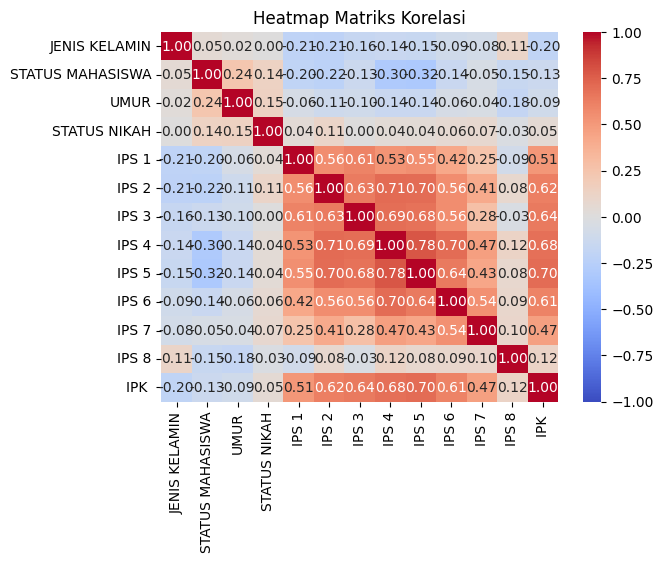

In [ ]:
# Matriks korelasi
matriks_korelasi = kelulusan.corr()

# Membuat heatmap dengan seaborn
sns.heatmap(matriks_korelasi, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

# Menambahkan judul
plt.title("Heatmap Matriks Korelasi")

# Menampilkan plot
plt.show()

In [ ]:
scaler = MinMaxScaler()
kelulusan[['JENIS KELAMIN', 'STATUS MAHASISWA', 'UMUR', 'STATUS NIKAH', 'IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8', 'IPK ' ]] = scaler.fit_transform(kelulusan[['JENIS KELAMIN', 'STATUS MAHASISWA', 'UMUR', 'STATUS NIKAH', 'IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8', 'IPK ']])

In [ ]:
# Pisahkan atribut dan label
X = kelulusan.drop('STATUS KELULUSAN', axis=1)  # Atribut
y = kelulusan['STATUS KELULUSAN']  # Label

In [ ]:
from sklearn.decomposition import PCA

# Terapkan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Buat DataFrame baru dari hasil PCA
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Gabungkan dengan label untuk analisis lebih lanjut
result_df = pd.concat([pca_df, y], axis=1)

# Tampilkan hasil
print(result_df.head(50))

         PC1       PC2 STATUS KELULUSAN
0  -0.368834  0.938928        TERLAMBAT
1  -0.719401  0.116642        TERLAMBAT
2  -0.484561  0.855235        TERLAMBAT
3  -0.796145  0.045336        TERLAMBAT
4  -0.368746  0.945832        TERLAMBAT
5   0.525388  0.582140        TERLAMBAT
6  -0.665307 -0.204811            TEPAT
7  -0.597231 -0.058863            TEPAT
8  -0.471174  0.883439        TERLAMBAT
9  -0.174509  1.075683        TERLAMBAT
10 -0.405006  0.494042        TERLAMBAT
11 -0.100375  1.073320        TERLAMBAT
12 -0.193937  0.928295        TERLAMBAT
13 -0.278089  1.022023        TERLAMBAT
14 -0.747086 -0.267717        TERLAMBAT
15  0.272019 -0.380703        TERLAMBAT
16 -0.695750 -0.094265        TERLAMBAT
17  0.592708  0.620720        TERLAMBAT
18  0.416519 -0.153292        TERLAMBAT
19  0.126148 -0.446115            TEPAT
20  0.545526  0.181940        TERLAMBAT
21  0.536694  0.275571        TERLAMBAT
22  0.232907 -0.627062        TERLAMBAT
23  0.496414  0.565946        TERLAMBAT


In [ ]:
from sklearn.model_selection import train_test_split

# Melakukan pembagian data menjadi 80% training dan 20% testing
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
class_distribution = y.value_counts()
print(class_distribution)

TEPAT        359
TERLAMBAT    165
Name: STATUS KELULUSAN, dtype: int64


In [ ]:
print(f"Jumlah data training: {len(X_pca_train)}")
print(f"Jumlah data uji: {len(X_pca_test)}")

Jumlah data training: 419
Jumlah data uji: 105


In [ ]:
# Inisialisasi model SVM
svm_model = svm.SVC(kernel='linear', C=1.0)

# Latih model dengan data training
svm_model.fit(X_pca_train, y_train)

# Lakukan prediksi pada data validasi
y_pred = svm_model.predict(X_pca_train)

# Hitung akurasi
accuracy = accuracy_score(y_train, y_pred)
print(f'Akurasi model SVM dengan data training itu sendiri: {accuracy * 100:.2f}%')

# Hitung presisi, recall, dan F1-score
precision_test = precision_score(y_train, y_pred, average='weighted')
recall_test = recall_score(y_train, y_pred, average='weighted')
f1_test = f1_score(y_train, y_pred, average='weighted')

# Tampilkan hasil
print(f'Precision: {precision_test * 100:.2f}%')
print(f'Recall: {recall_test * 100:.2f}%')
print(f'F1-Score: {f1_test * 100:.2f}%')

Akurasi model SVM dengan data training itu sendiri: 91.89%
Precision: 91.99%
Recall: 91.89%
F1-Score: 91.67%


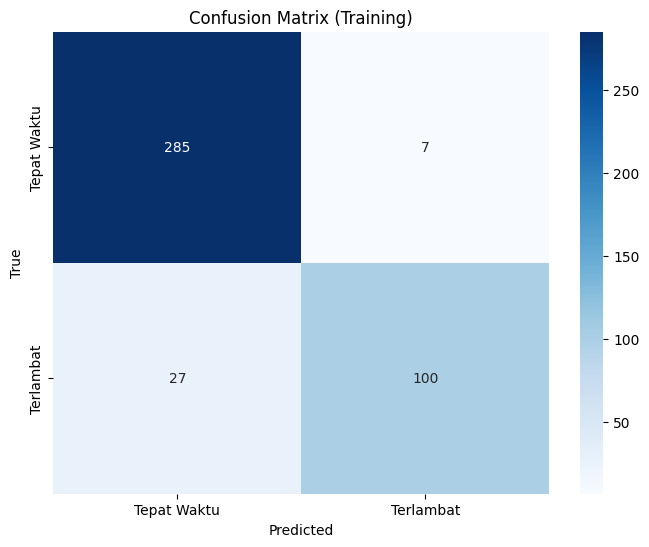

In [ ]:
# Hitung matriks confusi pada data validasi
conf_matrix_test = confusion_matrix(y_train, y_pred)

# Visualisasikan matriks confusi menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Tepat Waktu', 'Terlambat'], yticklabels=['Tepat Waktu', 'Terlambat'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Training)')
plt.show()

In [ ]:
# Inisialisasi model SVM
svm_model = svm.SVC(kernel='linear', C=1.0)

# Latih model dengan data training
svm_model.fit(X_pca_train, y_train)

# Lakukan prediksi pada data validasi
y_pred = svm_model.predict(X_pca_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model SVM dengan data testing: {accuracy * 100:.2f}%')

# Hitung presisi, recall, dan F1-score
precision_test = precision_score(y_test, y_pred, average='weighted')
recall_test = recall_score(y_test, y_pred, average='weighted')
f1_test = f1_score(y_test, y_pred, average='weighted')

# Tampilkan hasil
print(f'Precision: {precision_test * 100:.2f}%')
print(f'Recall: {recall_test * 100:.2f}%')
print(f'F1-Score: {f1_test * 100:.2f}%')


Akurasi model SVM dengan data testing: 88.57%
Precision: 89.08%
Recall: 88.57%
F1-Score: 88.22%


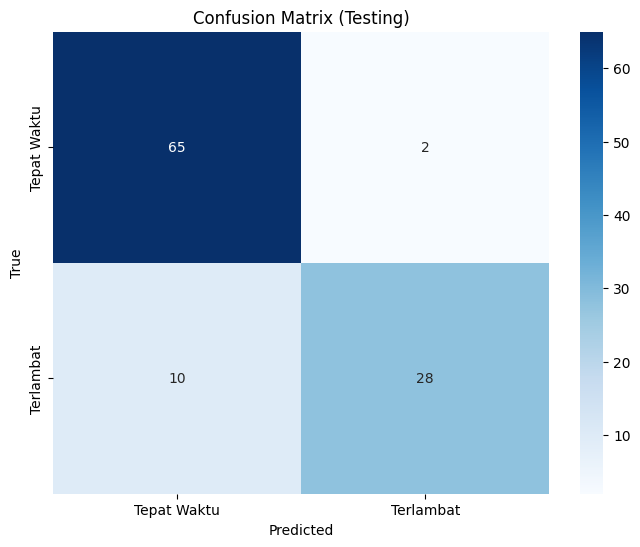

In [ ]:
# Hitung matriks confusi pada data validasi
conf_matrix_test = confusion_matrix(y_test, y_pred)

# Visualisasikan matriks confusi menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Tepat Waktu', 'Terlambat'], yticklabels=['Tepat Waktu', 'Terlambat'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Testing)')
plt.show()
